In [ ]:
"""
This dataset contains oil consumption by country from 1968 to 2023.
The dataset used in this analysis was collected from ourworldinata.org.
The dataset was stored and retrieved from an AWS s3 bucket.
This dataset contains data for 103 countries.
It should be noted that for countries that were a part of the former USSR there is no data until after 1987.
For this reason the analysis will cover the period 1990 - 2020

The aim of this analysis is to:

- analyze the historical consumption oil consumption of the G7 countries (sample) over the period.
- identify the 3 highest consumers
- identify the 2 lowest consumers

"""

In [ ]:
# install required packages

pip install pandas boto3 botocore python-dotenv openpyxl

In [87]:
# import and load the required packages

import pandas as pd
import boto3
import botocore
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
# define AWS environmental variables 

BUCKET_NAME='wlanalytics'
KEY='oil_consumption_by_country.xlsx'

In [5]:
# create s3 resource, connect to s3 bucket and download required file

s3 = boto3.resource('s3', aws_access_key_id=os.getenv('ACCESSKEY'), aws_secret_access_key=os.getenv('SECRETKEY'))

try:
    s3.Bucket(BUCKET_NAME).download_file(KEY, 'oil_consumption_by_country.xlsx')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [9]:
# create dataframe
dframe = pd.read_excel('./oil_consumption_by_country.xlsx')

In [ ]:
# Explore the dataset

In [10]:
# get the size of the dataset ie rows and columns
dframe.shape

(104, 60)

In [11]:
# verify the contents of the dataset
dframe.head()

,Entity,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa,342.133700,370.450000,369.19354,390.365700,398.153260,435.02704,474.305400,510.729600,549.803960,...,2144.31420,2202.63060,2221.60620,2265.23630,2299.4292,2295.12060,2055.27830,2242.39450,2361.33700,2358.96680
1,Africa (EI),342.133700,370.450000,369.19350,390.365700,398.153260,435.02707,474.305360,510.729600,549.804000,...,2144.31420,2202.63060,2221.60600,2265.23630,2299.4292,2295.12060,2055.27830,2242.39480,2361.33700,2358.96680
2,Algeria,15.405252,20.272705,18.94203,20.167301,21.305931,24.34768,27.440048,30.121414,32.900345,...,221.92514,236.14848,229.56384,225.51212,227.7859,236.95130,211.92543,221.20369,226.85338,238.20117
3,Argentina,275.215900,283.876300,290.73495,296.797200,308.011440,278.43550,296.501100,295.186200,297.198640,...,379.91560,387.81003,375.90500,371.47742,354.6256,321.83243,288.19510,350.89080,411.80594,391.43518
4,Asia,2249.215000,2581.326200,2914.79130,3263.277300,3828.259300,4448.17870,4877.736300,5359.248000,6035.336000,...,21917.21900,22717.43400,23577.45900,24234.17600,24661.9820,24869.03100,23509.30000,24311.85000,23162.40600,24282.18800


In [12]:
dframe.tail()

,Entity,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
99,Uzbekistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,46.81668,44.268963,53.28734,49.598866,56.866768,58.118244,62.331253,61.463074,61.494442,61.651016
100,Venezuela,112.023760,110.105300,112.342155,122.373310,120.897606,126.479774,127.675095,139.25276,152.887800,...,452.41968,395.106080,347.05972,298.712460,237.622700,234.658430,135.119490,145.359600,179.185410,234.035020
101,Vietnam,18.011540,39.364290,57.652416,58.814095,71.083626,73.694630,62.343380,64.54946,63.385323,...,219.13017,266.775400,294.09840,308.181640,324.449000,333.533450,282.962650,273.277650,295.888340,332.010250
102,Western Africa (EI),49.667866,51.230038,52.564472,54.598923,59.500107,62.925400,77.300750,81.87820,91.572430,...,307.40265,313.080870,348.82306,381.031280,443.644070,450.638980,442.950530,485.941650,506.023900,490.330080
103,World,18012.520000,19427.398000,20779.828000,22511.285000,24446.174000,26672.713000,28117.908000,30331.37500,32722.135000,...,50011.83000,50977.210000,52060.85000,52978.800000,53521.387000,53618.926000,48745.684000,51530.492000,53226.840000,54564.000000


In [10]:
# get the data types that make up the dataset
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  104 non-null    object 
 1   1965    104 non-null    float64
 2   1966    104 non-null    float64
 3   1967    104 non-null    float64
 4   1968    104 non-null    float64
 5   1969    104 non-null    float64
 6   1970    104 non-null    float64
 7   1971    104 non-null    float64
 8   1972    104 non-null    float64
 9   1973    104 non-null    float64
 10  1974    104 non-null    float64
 11  1975    104 non-null    float64
 12  1976    104 non-null    float64
 13  1977    104 non-null    float64
 14  1978    104 non-null    float64
 15  1979    104 non-null    float64
 16  1980    104 non-null    float64
 17  1981    104 non-null    float64
 18  1982    104 non-null    float64
 19  1983    104 non-null    float64
 20  1984    104 non-null    float64
 21  1985    104 non-null    float64
 22  19

In [13]:
# get basic summary statistics
dframe.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1065.957067,1150.892978,1231.799213,1335.847240,1452.964077,1586.586689,1672.251747,1803.777935,1945.653319,1911.841684,...,2903.831000,2960.121698,3023.282981,3075.926472,3104.902464,3110.027742,2824.930362,2985.544857,3026.839442,3099.484557
std,2899.928027,3119.712182,3331.599371,3608.934572,3918.164231,4264.310368,4475.476395,4823.058051,5187.972665,5047.988380,...,7218.274017,7375.747103,7537.004269,7674.210472,7760.419062,7777.830264,7094.760415,7480.716563,7605.035366,7816.211470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.051485,22.572415,24.590249,25.260858,26.092104,30.145415,32.889533,41.892467,42.324375,39.085914,...,108.029265,107.877517,111.851473,115.232835,119.307094,121.463030,102.524455,112.337378,107.281290,108.640630
50%,61.138286,66.267185,68.492032,76.503037,83.236630,91.374655,98.130230,102.226793,118.772594,113.770420,...,302.227385,318.061235,333.195240,347.341420,343.931680,331.963925,285.578875,314.920790,295.554110,308.372160
75%,342.133700,370.450000,369.193510,390.365700,398.153260,435.027047,474.305370,512.971325,570.848775,609.572125,...,1373.319050,1397.283375,1397.512700,1405.026975,1353.002150,1345.025275,1272.983050,1370.589800,1244.869650,1261.360150
max,18012.520000,19427.398000,20779.828000,22511.285000,24446.174000,26672.713000,28117.908000,30331.375000,32722.135000,32224.648000,...,50011.830000,50977.210000,52060.850000,52978.800000,53521.387000,53618.926000,48745.684000,51530.492000,53226.840000,54564.000000


In [12]:
# check for duplicated data

dframe.duplicated().sum()

np.int64(0)

In [13]:
# Start Analysis

In [15]:
# select data for only the G7 nations and the years 1990 - 2020

gseven_df = dframe.set_index('Entity').loc[['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States'], 1990:2020]

In [16]:
# save the the extracted data to a new file
gseven_df.to_csv('gseven_oil_data.csv')

In [25]:
# read in the sample data to a dataframe to start our analysis
df = pd.read_csv('gseven_oil_data.csv')

In [26]:
df

,0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Canada,962.81,912.67,936.50,948.58,968.86,1016.65,1041.77,1073.68,1094.42,...,1268.16,1285.49,1277.71,1274.66,1277.98,1273.51,1260.57,1300.69,1296.55,1101.60
1,France,1060.05,1141.04,1139.61,1101.70,1070.28,1084.53,1110.01,1112.27,1155.77,...,963.96,931.18,919.25,889.43,902.66,888.00,901.53,879.65,872.40,728.39
2,Germany,1537.29,1607.61,1621.66,1646.87,1631.97,1631.13,1658.88,1648.93,1650.72,...,1313.27,1305.39,1334.26,1298.32,1296.54,1321.88,1347.51,1279.24,1292.16,1168.20
3,Italy,1127.53,1134.52,1150.39,1119.80,1116.12,1153.95,1134.07,1145.14,1141.96,...,828.88,772.21,706.48,671.28,710.44,704.79,713.69,730.33,709.05,585.49
4,Japan,2928.80,3023.09,3098.17,3044.27,3212.05,3234.18,3259.99,3224.35,3134.14,...,2512.02,2666.30,2552.17,2422.20,2335.94,2268.99,2244.13,2166.80,2112.39,1877.53
5,United Kingdom,1000.72,996.06,1007.18,1012.24,1001.67,989.95,1014.60,985.44,975.03,...,867.00,843.67,828.55,829.31,851.88,870.48,882.03,871.23,853.76,657.19
6,United States,9309.47,9111.92,9301.15,9382.41,9623.49,9600.03,9951.11,10083.61,10251.98,...,9697.58,9472.09,9628.43,9692.96,9891.11,9965.48,10062.59,10303.76,10287.68,9035.32


In [27]:
# convert the columns from string to numeric so that calculations can be performed on each column without issue
df.columns = pd.to_numeric(df.columns)

In [28]:
df

,0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Canada,962.81,912.67,936.50,948.58,968.86,1016.65,1041.77,1073.68,1094.42,...,1268.16,1285.49,1277.71,1274.66,1277.98,1273.51,1260.57,1300.69,1296.55,1101.60
1,France,1060.05,1141.04,1139.61,1101.70,1070.28,1084.53,1110.01,1112.27,1155.77,...,963.96,931.18,919.25,889.43,902.66,888.00,901.53,879.65,872.40,728.39
2,Germany,1537.29,1607.61,1621.66,1646.87,1631.97,1631.13,1658.88,1648.93,1650.72,...,1313.27,1305.39,1334.26,1298.32,1296.54,1321.88,1347.51,1279.24,1292.16,1168.20
3,Italy,1127.53,1134.52,1150.39,1119.80,1116.12,1153.95,1134.07,1145.14,1141.96,...,828.88,772.21,706.48,671.28,710.44,704.79,713.69,730.33,709.05,585.49
4,Japan,2928.80,3023.09,3098.17,3044.27,3212.05,3234.18,3259.99,3224.35,3134.14,...,2512.02,2666.30,2552.17,2422.20,2335.94,2268.99,2244.13,2166.80,2112.39,1877.53
5,United Kingdom,1000.72,996.06,1007.18,1012.24,1001.67,989.95,1014.60,985.44,975.03,...,867.00,843.67,828.55,829.31,851.88,870.48,882.03,871.23,853.76,657.19
6,United States,9309.47,9111.92,9301.15,9382.41,9623.49,9600.03,9951.11,10083.61,10251.98,...,9697.58,9472.09,9628.43,9692.96,9891.11,9965.48,10062.59,10303.76,10287.68,9035.32


In [33]:
df.set_index(0)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,,,,,,,,,,,,,,,,,,,,,
Canada,962.81,912.67,936.50,948.58,968.86,1016.65,1041.77,1073.68,1094.42,1115.55,...,1268.16,1285.49,1277.71,1274.66,1277.98,1273.51,1260.57,1300.69,1296.55,1101.60
France,1060.05,1141.04,1139.61,1101.70,1070.28,1084.53,1110.01,1112.27,1155.77,1159.91,...,963.96,931.18,919.25,889.43,902.66,888.00,901.53,879.65,872.40,728.39
Germany,1537.29,1607.61,1621.66,1646.87,1631.97,1631.13,1658.88,1648.93,1650.72,1601.11,...,1313.27,1305.39,1334.26,1298.32,1296.54,1321.88,1347.51,1279.24,1292.16,1168.20
Italy,1127.53,1134.52,1150.39,1119.80,1116.12,1153.95,1134.07,1145.14,1141.96,1132.53,...,828.88,772.21,706.48,671.28,710.44,704.79,713.69,730.33,709.05,585.49
Japan,2928.80,3023.09,3098.17,3044.27,3212.05,3234.18,3259.99,3224.35,3134.14,3181.52,...,2512.02,2666.30,2552.17,2422.20,2335.94,2268.99,2244.13,2166.80,2112.39,1877.53
United Kingdom,1000.72,996.06,1007.18,1012.24,1001.67,989.95,1014.60,985.44,975.03,962.24,...,867.00,843.67,828.55,829.31,851.88,870.48,882.03,871.23,853.76,657.19
United States,9309.47,9111.92,9301.15,9382.41,9623.49,9600.03,9951.11,10083.61,10251.98,10537.06,...,9697.58,9472.09,9628.43,9692.96,9891.11,9965.48,10062.59,10303.76,10287.68,9035.32


In [53]:
# total oil consumption by year in TWh

df.loc[0:7, 1990:2020].sum(axis=0)

1990    17926.67
1991    17926.91
1992    18254.66
1993    18255.87
1994    18624.44
1995    18710.42
1996    19170.43
1997    19273.42
1998    19404.02
1999    19689.92
2000    19733.59
2001    19642.36
2002    19548.25
2003    19819.46
2004    20192.10
2005    20153.02
2006    19893.87
2007    19551.34
2008    18644.27
2009    17578.07
2010    17749.85
2011    17450.87
2012    17276.33
2013    17246.85
2014    17078.16
2015    17266.55
2016    17293.13
2017    17412.05
2018    17531.70
2019    17423.99
2020    15153.72
dtype: float64

In [77]:
# total consumption by each country over the period 1990 -2020 in TWh

total_consumption = df.loc[0:7, 1990:2020].sum(axis=1)
total_consumption

0     36147.73
1     31979.13
2     45223.63
3     29750.03
4     86689.18
5     28747.55
6    312339.04
dtype: float64

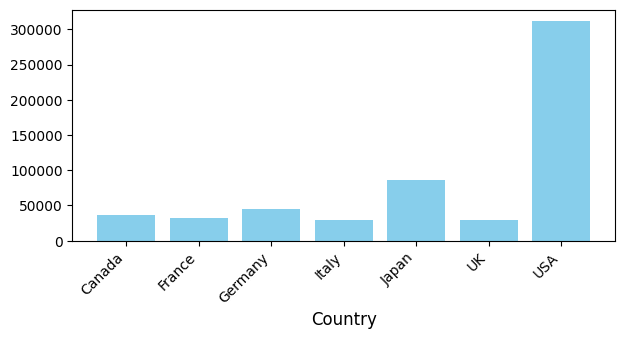

In [93]:
countries = [0, 1, 2, 3, 4, 5, 6]
values = [36147.73, 31979.13, 45223.63, 29750.03, 86689.18, 28747.55, 312339.04]

country_labels = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'UK', 'USA']


plt.figure(figsize=(7, 3))
plt.bar(countries, values, color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.xticks(countries, country_labels, rotation=45, ha="right") 


plt.show()

In [78]:
# add new column to hold 
df['total_by_country'] = total_consumption

In [55]:
# average consumption per year in TWh

df.loc[0:7, 1990:2020].mean(axis=0)

1990    2560.952857
1991    2560.987143
1992    2607.808571
1993    2607.981429
1994    2660.634286
1995    2672.917143
1996    2738.632857
1997    2753.345714
1998    2772.002857
1999    2812.845714
2000    2819.084286
2001    2806.051429
2002    2792.607143
2003    2831.351429
2004    2884.585714
2005    2879.002857
2006    2841.981429
2007    2793.048571
2008    2663.467143
2009    2511.152857
2010    2535.692857
2011    2492.981429
2012    2468.047143
2013    2463.835714
2014    2439.737143
2015    2466.650000
2016    2470.447143
2017    2487.435714
2018    2504.528571
2019    2489.141429
2020    2164.817143
dtype: float64

In [76]:
# average consumption by each country in TWh
df.loc[0:7, 1990:2020].mean(axis=1)

0     1166.055806
1     1031.584839
2     1458.826774
3      959.678387
4     2796.425161
5      927.340323
6    10075.452903
dtype: float64

In [94]:
# top 3 consumers - add mew column to hold value, use that column to sort

highest_consumers = df.sort_values(by='total_by_country', ascending=False)
highest_consumers.head(3)

,0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_by_country
6,United States,9309.47,9111.92,9301.15,9382.41,9623.49,9600.03,9951.11,10083.61,10251.98,...,9472.09,9628.43,9692.96,9891.11,9965.48,10062.59,10303.76,10287.68,9035.32,312339.04
4,Japan,2928.80,3023.09,3098.17,3044.27,3212.05,3234.18,3259.99,3224.35,3134.14,...,2666.30,2552.17,2422.20,2335.94,2268.99,2244.13,2166.80,2112.39,1877.53,86689.18
2,Germany,1537.29,1607.61,1621.66,1646.87,1631.97,1631.13,1658.88,1648.93,1650.72,...,1305.39,1334.26,1298.32,1296.54,1321.88,1347.51,1279.24,1292.16,1168.20,45223.63


In [82]:
# two lowest consumers 

highest_consumers = df.sort_values(by='total_by_country', ascending=False)
highest_consumers.tail(2)

,0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,total_by_country
3,Italy,1127.53,1134.52,1150.39,1119.80,1116.12,1153.95,1134.07,1145.14,1141.96,...,772.21,706.48,671.28,710.44,704.79,713.69,730.33,709.05,585.49,29750.03
5,United Kingdom,1000.72,996.06,1007.18,1012.24,1001.67,989.95,1014.60,985.44,975.03,...,843.67,828.55,829.31,851.88,870.48,882.03,871.23,853.76,657.19,28747.55
